# Classification

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist["data"], mnist["target"]

In [4]:
x = x[:30000]

In [5]:
y = y[:30000]

In [6]:
x.shape
# 784 here depicts the 28*28 pixels used for each image

(30000, 784)

In [7]:
y.shape

(30000,)

In [8]:
# Lets us try printing an image using matplotlib (this array contains shades of grey)

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
random_digit = x[1234]

In [11]:
# To get an image we need to reshape the array into 28*28 matrix

In [12]:
random_digit_image = random_digit.reshape(28,28)

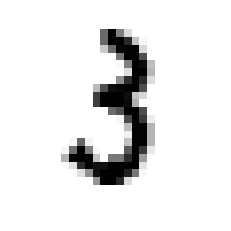

In [13]:
plt.imshow(random_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [14]:
y[1234]

'3'

In [15]:
# Creating a testing and training dataset
x_train, x_test, y_train, y_test = x[:20000], x[20000:], y[:20000], y[20000:]

###### Shuffling the training data set to prevent bias in the dataset (to try this for time series data)

In [16]:
shuffle_index = np.random.permutation(20000)

In [17]:
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

###### First we try training a binary classifier (whether it is a 3 or not)

In [18]:
y_train

array(['6', '6', '3', ..., '8', '7', '0'], dtype=object)

In [19]:
y_train_3 = (y_train == '3') #true for all y == 3 and false otherwise

### Using stochastic gradient descent for classification

In [20]:
# This classifier has the advantage of being capable of handling very large datasets efficiently.
# This is in part because SGD deals with training instances independently, one at a time
# (which also makes SGD well suited for online learning)

In [21]:
from sklearn.linear_model import SGDClassifier

In [22]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_3)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
sgd_clf.predict([random_digit])

array([ True])

### Checking models performance

In [24]:
# Measuring performance of a classifier is lot tougher than measuring for a regressor

###### Measuring accuracy using cross-validation

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(x_train, y_train_3):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_3[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_3[test_index])
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))
    
# The StratifiedKFold class performs stratified sampling to produce folds that contain a representative ratio of each class.
# At each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes
# predictions on the test fold. Then it counts the number of correct predictions and outputs the ratio of correct predictions.

C:\Users\bhara\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9559022048897555
0.9593520323983801
0.9614461446144614


In [26]:
# accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed 
# datasets (i.e., when some classes are much more frequent than others).

# For eg. if you predict that an image is not a 3 it shows above 90% accuracy even with a faulty classifier.
# because the data for non 3 is 90% true anyways, so even if its a faulty classifier it will correct 90% of the time.

### Confusion Matrix

In [27]:
# To know how many times the classifier got confused and gave the wrong output

# To check this on the above dataset (we try not to do this exercise on the test dataset as we want to save it for the 
# final classifer)

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_3, cv=3)

# performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test
# fold. This means that you get a clean prediction for each instance in the training set.

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_3, y_train_pred)

# each row represents an actual class whereas each column represent a predicted class
# [1,1] are the true negatives (non 3's correctly classified as non 3's)
# [2,2] are the true positives (3's correctly classifies as 3's)
# [1,2] are wrongly classified as 3's and are called false positives
# [2,1] are wrongly classifies as non 3's called false negatives

array([[17602,   322],
       [  500,  1576]], dtype=int64)

In [29]:
# precision = TP/(TP + FP)
# if the number of predictions to be made for the true case are very less then the value for precision will be very high.
# To avoid that we use recall also called sensitivity or true positive rate

# recall = TP/(TP + FN)
# the ratio of positive instances that are correctly detected by the classifier

### Precision and Recall

In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
precision_score(y_train_3, y_train_pred)

0.8303477344573235

In [32]:
recall_score(y_train_3, y_train_pred)

0.7591522157996147

In [33]:
# So whenever it claims that an image is 3 it is correct only 80% of the time and also it is only able to detect 77% of the 3's

In [34]:
# It is easier to combine these two metrics and give them a combined score called as F1 score which is the harmonic mean of 
# precision and recall

# F1 = 2/(1/precision + 1/recall)
# F1 = TP/(TP + ((FN + FP)/2))

In [35]:
from sklearn.metrics import f1_score
f1_score(y_train_3, y_train_pred)

0.7931555108203323

In [36]:
# The F1 score favors classifiers that have similar precision and recall.
# That does not mean your bussiness requires both of them.

# For example, if you trained a classifier to detect videos that are safe for kids, you would probably prefer a classifier
# that rejects many good videos (low recall) but keeps only safe ones (high precision), rather than a classifier that has a
# much higher recall but lets a few really bad videos show up in your product (in such cases, you may even want to add a 
# human pipeline to check the classifier’s video selection).

# On the other hand, suppose you train a classifier to detect shoplifters on surveillance images: it is probably fine if 
# your classifier has only 30% precision as long as it has 99% recall (sure, the security guards will get a few false
# alerts, but almost all shoplifters will get caught)

### Precision/ Recall Tradeoff

In [37]:
# How a SGD classifier works?
# For each instance it computes a score based on desicion function and if the score is greater than the provided threshold, it
# it classifies them as positive else negative.

###### Increasing precision reduces recall and vice versa


<img src="notes_images/precision_recall_tradeoff.PNG">

In [38]:
# lowering the threshold increases recall and reduces precision and vice-versa

# Adjusting the decision score to modify the threshold
y_scores = sgd_clf.decision_function([random_digit])
print(y_scores)

threshold = 0   # you can manually adjust the threshold over here
                #  SGDClassifier uses a threshold equal to 0 by default
y_random_digit_pred = (y_scores > threshold)

print(y_random_digit_pred)

[9634.47535774]
[ True]


###### Deciding what threshold to be used

In [39]:
# We require scores of all instances in the training set using the cross_val_predict() function specifying that you want it to
# return decision scores instead of predictions

y_scores = cross_val_predict(sgd_clf, x_train, y_train_3, cv=3, method="decision_function")

In [42]:
# Computing precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_3, y_scores)

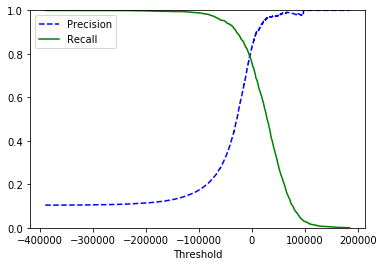

In [44]:
# Plotting the curve
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [45]:
# If we observe closely the precision curve is bumpier at the end. This is beacuse of the FP lying at the with a very high score
# So, as our threshold increases the value for the precision decreases till the score of the false positive and our threshold
# match

Text(0, 0.5, 'Precision')

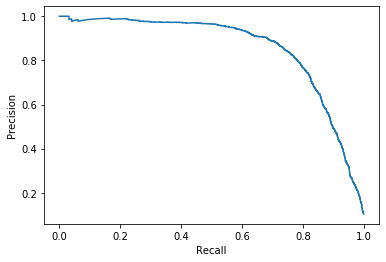

In [55]:
# We can also plot precision directly as a function of recall to select the best threshold
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")

# We see that precision fally sharply here just after 65% mark, so we should take a threshold just before that

### The ROC Curve

### Multiclass Classification

### Error Analysis

### Multilabel Classification

### Multioutput Classification

In [59]:
import psutil
print(psutil.virtual_memory())

svmem(total=8424574976, available=3860217856, percent=54.2, used=4564357120, free=3860217856)
